# Link utilizado para pegar as cotações das moedas:https://docs.awesomeapi.com.br/api-de-moedas#legendas


# Importando Bibliotecas utilizadas no projeto

In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Solicitando as informações ao usuário de qual moeda fazer a cotação

In [3]:
cotacao_moeda = str(input('Qual moeda fazer cotação: '))

Qual moeda fazer cotação: BTC


# Solicitando as informações ao usuário de quantos dias anteriores fazer a cotação do BID

In [4]:
cotacoes_anteriores = int(input('Pegar cotação de quantos dias anteriores: '))

Pegar cotação de quantos dias anteriores: 30


# Solicitando as informações ao usuário de qual determinado tempo fazer a cotação do BID

In [5]:
data_cotacao_inicio = str(input('Data de inicio: '))
data_cotacao_final = str(input('Data final: '))

Data de inicio: 20210306
Data final: 20220306


# Trasformando a URL da API em uma constante

In [6]:
url_cotacao_atualizada = f"https://economia.awesomeapi.com.br/json/last/{cotacao_moeda}-BRL"
url_cotacao_dias_anteriores = f"https://economia.awesomeapi.com.br/json/daily/{cotacao_moeda}-BRL/{cotacoes_anteriores}"
url_cotacao_determinada_data = f"https://economia.awesomeapi.com.br/{cotacao_moeda}-BRL/365?start_date={data_cotacao_inicio}&end_date={data_cotacao_final}"

# Criando a função que puxa os dados atualizados da API

In [7]:
def cotacao_atualizada():
    r = requests.get(url_cotacao_atualizada)
    r_json = r.json()
    return r.json()

# Criando a função que puxa os dados dos dias anteriores da API

In [8]:
def cotacao_dias_anteriores():
    r = requests.get(url_cotacao_dias_anteriores)
    r_json = r.json()
    return r.json()

# Criando a função que puxa os dados de determinada data na API

In [9]:
def cotacao_por_data():
    r = requests.get(url_cotacao_determinada_data)
    r_json = r.json()
    return r_json

# Mostrando na tela informações da cotação atualizada em um dicionário

In [10]:
cotacao_atual_dict = cotacao_atualizada()
cotacao_atual_dict

{'BTCBRL': {'code': 'BTC',
  'codein': 'BRL',
  'name': 'Bitcoin/Real Brasileiro',
  'high': '202.957',
  'low': '195.256',
  'varBid': '-4978',
  'pctChange': '-2.46',
  'bid': '197.351',
  'ask': '197.485',
  'timestamp': '1646616411',
  'create_date': '2022-03-06 22:26:51'}}

# Mostrando na tela informações da cotação atualizada em um DataFrame

In [11]:
cotacao_atual_df = pd.DataFrame(cotacao_atual_dict)
cotacao_atual_df

,BTCBRL
ask,197.485
bid,197.351
code,BTC
codein,BRL
create_date,2022-03-06 22:26:51
high,202.957
low,195.256
name,Bitcoin/Real Brasileiro
pctChange,-2.46
timestamp,1646616411


# Mostrando na tela informações da cotação dos últimos 30 dias em um dicionário

In [12]:
cotacao_ultimos_dias_dict = cotacao_dias_anteriores()
print(cotacao_ultimos_dias_dict)


[{'code': 'BTC', 'codein': 'BRL', 'name': 'Bitcoin/Real Brasileiro', 'high': '281.4', 'low': '267.55', 'varBid': '-5765', 'pctChange': '-2.06', 'bid': '274.238', 'ask': '274.308', 'timestamp': '1639105051', 'create_date': '2021-12-09 23:57:31'}, {'high': '287', 'low': '276.436', 'varBid': '-7000', 'pctChange': '-2.44', 'bid': '280.013', 'ask': '280.013', 'timestamp': '1639018748'}, {'high': '297.148', 'low': '283.872', 'varBid': '-5424', 'pctChange': '-1.86', 'bid': '286.195', 'ask': '286.262', 'timestamp': '1638932356'}, {'high': '294.468', 'low': '270.15', 'varBid': '11554', 'pctChange': '4.12', 'bid': '291.627', 'ask': '291.724', 'timestamp': '1638845161'}, {'high': '287.51', 'low': '274', 'varBid': '-3767', 'pctChange': '-1.33', 'bid': '279.474', 'ask': '279.82', 'timestamp': '1638759034'}, {'high': '304.288', 'low': '267', 'varBid': '-20941', 'pctChange': '-6.88', 'bid': '283.347', 'ask': '283.347', 'timestamp': '1638672860'}, {'high': '326', 'low': '300', 'varBid': '-15793', 'pct

In [13]:
lista_dias = []
for dia in range(1, cotacoes_anteriores+1):
    lista_dias.append(dia)
print(lista_dias)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [14]:
lista_bid_ultimos_dias = []
for bid in cotacao_ultimos_dias_dict:
    lista_bid_ultimos_dias.append(float(bid['bid']))
lista_bid_ultimos_dias.reverse()

In [15]:
print(lista_bid_ultimos_dias)

[227.574, 227.891, 234.858, 253.945, 280.532, 300.006, 297.4, 301.59, 354.504, 352.163, 350.553, 351.0, 347.65, 332.666, 338.821, 335.024, 327.091, 309.489, 308.65, 324.228, 323.752, 325.002, 320.361, 304.288, 283.347, 279.474, 291.627, 286.195, 280.013, 274.238]


In [16]:
lista_axiliar = list(zip(lista_dias,lista_bid_ultimos_dias))
print(lista_axiliar)

[(1, 227.574), (2, 227.891), (3, 234.858), (4, 253.945), (5, 280.532), (6, 300.006), (7, 297.4), (8, 301.59), (9, 354.504), (10, 352.163), (11, 350.553), (12, 351.0), (13, 347.65), (14, 332.666), (15, 338.821), (16, 335.024), (17, 327.091), (18, 309.489), (19, 308.65), (20, 324.228), (21, 323.752), (22, 325.002), (23, 320.361), (24, 304.288), (25, 283.347), (26, 279.474), (27, 291.627), (28, 286.195), (29, 280.013), (30, 274.238)]


# Trasformando as informações da cotação dos últimos 30 dias em um DataFrame

In [17]:
tabela_bid_df = pd.DataFrame(lista_axiliar)
tabela_bid_df = tabela_bid_df.rename(columns={0:'Dia',1:"Bid"})



# Mostrando na tela informações da cotação dos últimos 30 dias em um DataFrame

In [18]:
tabela_bid_df

,Dia,Bid
0,1,227.574
1,2,227.891
2,3,234.858
3,4,253.945
4,5,280.532
5,6,300.006
6,7,297.400
7,8,301.590
8,9,354.504
9,10,352.163


# Mostrando em um gráfico a cotação dos últimos 30 dias do BID

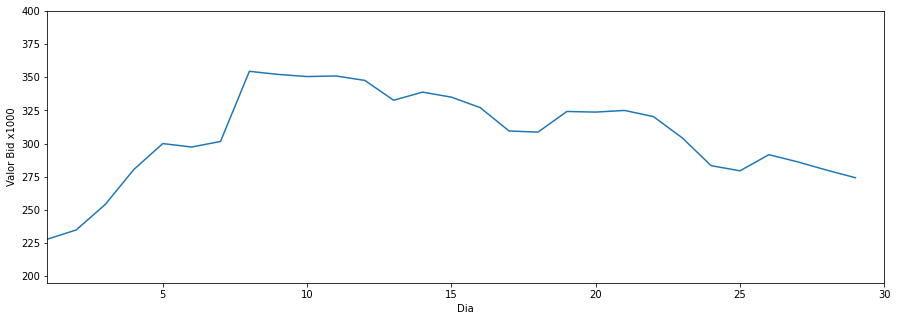

In [21]:
plt.figure(figsize=(15,5))
plt.plot(tabela_bid_df['Bid'])
plt.axis([1,30,195,400])
plt.ylabel('Valor Bid x1000')
plt.xlabel('Dia')

plt.show()


# Pegando a cotação do BID dentro de 1 ano e passando para um dicionário

In [22]:
cotacao_bid_data_dict = cotacao_por_data()

In [23]:
lista_bid_data = []
for bid in cotacao_bid_data_dict:
    lista_bid_data.append(float(bid['bid']))
lista_bid_data.reverse()

In [24]:
print(lista_bid_data)

[211.321, 211.321, 210.853, 211.121, 211.038, 211.4, 211.729, 211.734, 211.526, 211.279, 211.413, 211.303, 211.303, 211.275, 211.275, 211.919, 212.017, 211.714, 211.425, 210.227, 210.363, 210.945, 210.977, 211.223, 211.118, 211.0, 210.351, 211.374, 209.004, 209.738, 207.923, 208.004, 208.045, 208.067, 207.227, 207.8, 207.51, 208.376, 208.338, 208.456, 208.473, 208.472, 208.472, 208.478, 208.465, 208.02, 208.02, 207.779, 208.133, 207.764, 207.764, 207.8, 205.5, 204.0, 201.231, 201.119, 201.672, 201.88, 200.744, 200.744, 201.5, 201.339, 201.144, 200.0, 199.501, 198.9, 198.987, 198.989, 199.614, 199.68, 200.0, 200.134, 200.358, 200.011, 199.729, 199.701, 199.359, 198.438, 198.6, 199.0, 198.031, 199.13, 199.027, 199.586, 199.648, 199.541, 199.748, 199.748, 199.748, 199.191, 199.191, 199.37, 199.197, 199.028, 199.9, 199.621, 199.971, 199.374, 199.374, 199.025, 199.0, 199.0, 199.0, 199.021, 199.038, 199.044, 199.101, 199.441, 199.916, 199.916, 199.916, 199.916, 199.916, 199.916, 199.916, 199

# Mostrando em um gráfico os valores do BID em 1 ano

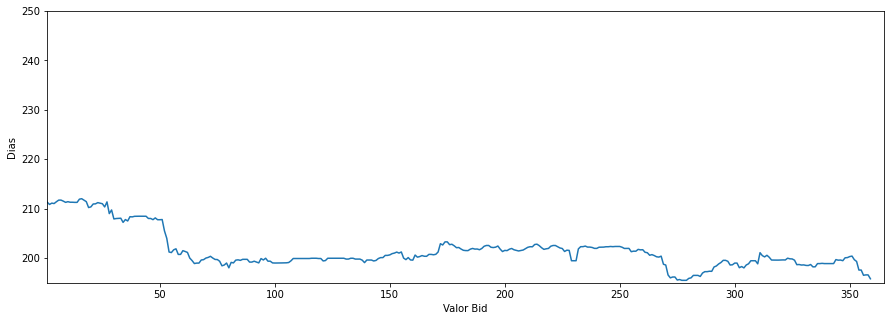

In [27]:
plt.figure(figsize=(15,5))
plt.plot(lista_bid_data)
plt.xlabel('Valor Bid')
plt.ylabel('Dias')
plt.axis([1,365,195,250])
plt.show()

# Legendas
## Bid = Compra
## Ask = Venda
## VarBid = Variação
## pctChange = Porcentagem de Variação
## High = Maximo
## Low = Mínimo